## SP Lab Assignment 6: FIR and IIR Filters Design 
Q.1.(a)Determine and plot frequecy response of FIR Filters using Hamming windowing function. The details about FIR Filter Design are given:https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html#scipy.signal.firwin <br>
Important window functions: hamming,hann, blackman, triang, bartlett, flattop, parzen, bohman, blackmanharris, nuttall, barthann, kaiser (needs beta), gaussian (needs standard deviation), general_gaussian (needs power, width), slepian (needs width), dpss (needs normalized half-bandwidth), chebwin (needs attenuation), exponential (needs decay scale), tukey (needs taper fraction)<br>
Python Function example: signal.get_window('triang', 7) <br>
(b)Repeat part(a) for hann, blackman, and bartlett windowing functions

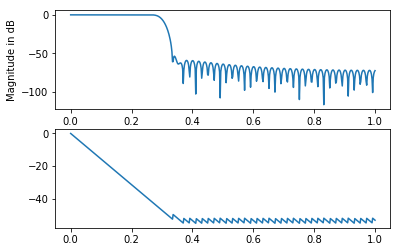

In [15]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

def freqzm(b,a=1):
    w,h = sig.freqz(b,a)
    h_mag = 20*np.log10(abs(h))
    plt.subplot(2,1,1)
    plt.plot(w/max(w),h_mag)
    plt.ylabel("Magnitude in dB")
    h_p = np.unwrap(np.arctan2(np.imag(h),np.real(h)))
    plt.subplot(2,1,2)
    plt.plot(w/max(w),h_p)

n=101
b = sig.firwin(n,0.3,window="hamming",pass_zero=True)
freqzm(b)
# f = 0.5 # Frequency
# N = 100
# y = sig.firwin(N, f)
# # Windowing Functions
# w = sig.get_window("hamming",100)

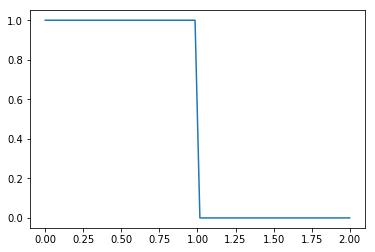

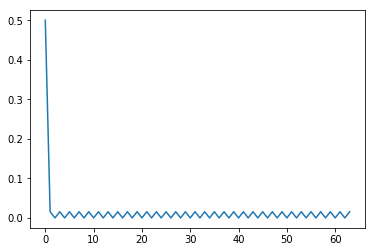

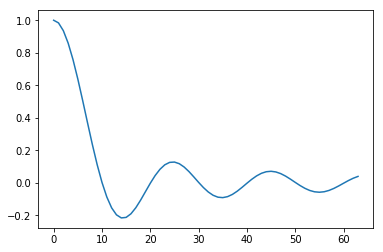

In [86]:
import numpy as np
import matplotlib.pyplot as plt

n = np.linspace(0, 2*np.pi, 64)
def signal(a):
    if(abs(a)< np.pi):
        return 1
    else:
        return 0

H = np.zeros(len(n))
for i in range(len(n)):
    H[i] = signal(n[i])
plt.plot(n/np.pi,H)
plt.show()

h = np.fft.ifft(H)
plt.plot(h)
plt.show()
x = np.sinc(n)
plt.plot(x)


Q.2. Plot the frequecy resposne of LPF, HPF, BPF,and BSF FIR Filters with the following design parameters <br>
(a)LPF  and HPF <br>
fs = 22050.0       # Sample rate, Hz <br>
cutoff = 8000.0    # Desired cutoff frequency, Hz <br>
trans_width = 250  # Width of transition from pass band to stop band, Hz <br>
numtaps = 125      # Size of the FIR filter.<br>

(b)BPF and BSF  <br>
fs = 22050.0       # Sample rate, Hz <br>
band = [2000, 5000]  # Desired stop band, Hz <br>
trans_width = 250  # Width of transition from pass band to stop band, Hz <br>
numtaps = 125      # Size of the FIR filter.<br>

The details about Python function  {scipy.signal.remez} are given:  https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.remez.html#scipy.signal.remez. <br>
 {tabs=scipy.signal.remez(numtaps, bands, desired, weight=None, Hz=None, type='bandpass', maxiter=25, grid_density=16, fs=None)[source]} 

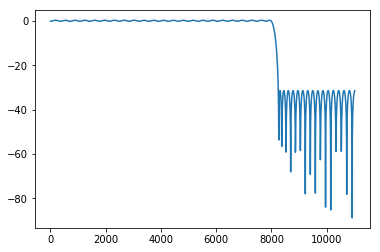

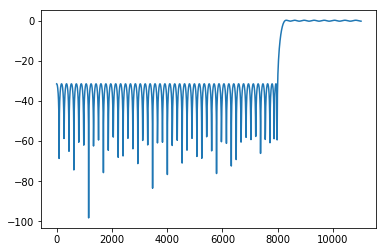

In [91]:
def freq_resp(fs, w, h):
    plt.plot(.5*fs*w/np.pi, 20*np.log10(h))
    plt.show()
    
fs = 22050
cutoff = 8000
trans_width=250
numtaps =125

taps = sig.remez(numtaps,[0,cutoff,cutoff+trans_width,0.5*fs],[1,0],Hz=fs)
w, h = sig.freqz(taps, [1],worN = 2000)
freq_resp(fs,w,h)

taps = sig.remez(numtaps,[0,cutoff,cutoff+trans_width,0.5*fs],[0,1],Hz=fs)
w, h = sig.freqz(taps, [1],worN = 2000)
freq_resp(fs,w,h)


fs = 22050
band = [2000,5000]
trans_width=250
numtaps =125
taps = sig.remez(numtaps,[0,cutoff,cutoff+trans_width,0.5*fs],[1,0],Hz=fs)


Q.3. (a) For the Filter coefficients, we need to design a Low FIR filter that will suppress the 200Hz component by at least 30dB while leaving the 100Hz component alone. The digiatl low FIR filter with design specifications: passband between 0 to 200 and stop band from 300 to 500 (half the sampling frequency of 1000Hz). <br>
Python function: taps=scipy.signal.remez(numtaps, bands, desired, weight=None, Hz=None, type='bandpass', maxiter=25, grid_density=16, fs=None) <br>
(b) Determine and plot the filtered output signal using FIR Remez Algorithm  with design specifications mentioned in part(a) for the following signal and also compare between noisy signal and filted output signal: <br>
$x(n)=sin(0.2\pi n)+sin(1.2\pi n)+w[n]; 0 ≤ n ≤ 40;$  Where $w(n)$ is ramdom noise with noise amplitude 20.
 

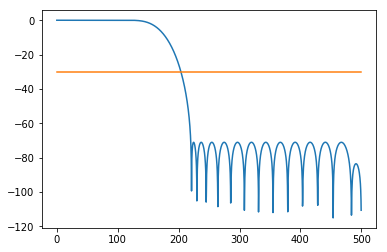

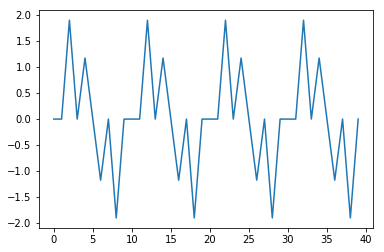

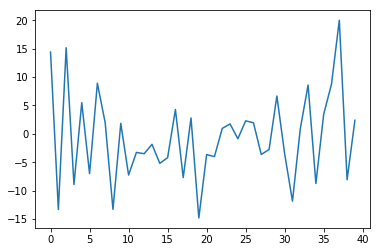

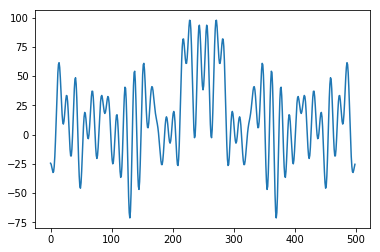

In [133]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.io.wavfile as wav

k = np.ones(500)
k*=-30
def freq_resp(fs, w, h):
    plt.plot(.5*fs*w/np.pi, 20*np.log10(h))
    plt.plot(k)
    plt.show()
    
fs = 1000
cutoff = 120
trans_width=100
numtaps = 40

taps = sig.remez(numtaps,[0,cutoff,cutoff+trans_width,0.5*fs],[1,0],Hz=fs)
w, h = sig.freqz(taps, [1],worN = 2000)
freq_resp(fs,w,h)

def sig1(n):
    return np.sin(0.2*np.pi*n)+np.sin(1.2*np.pi*n)

k = np.random.normal(0,1,40)
k = k/max(k)
k=20*k
n = np.arange(0,40)
xn = sig1(n)+k
plt.plot(sig1(n))
plt.show()
plt.plot(xn)
plt.show()

x_nfft= np.fft.fft(xn,500)*
plt.plot(x_nfft)

In [126]:
w

array([0.00000000e+00, 1.57079633e-03, 3.14159265e-03, ...,
       3.13688026e+00, 3.13845106e+00, 3.14002186e+00])

In [114]:
np.random.randn?

In [108]:
20*np.log10(abs(h[200]))

-0.0018953250647085807

Q.4.(a) Determine and plot the filtered output signal by FIR Hamming window function for the following signal and also compare between noisy signal and filted output signal: <br>
 $x(n)=sin(0.2\pi n)+sin(1.2\pi n)+w[n]; 0 ≤ n ≤ 60;$;Where $w(n)$ is ramdom noise with noise amplitude 20.<br>
 (b)Repeat part(a) for hann, blackman, and bartlett windowing functions

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.signal as sig


Q.5.(a)Determine and plot the  filtered output signal by FIR Hamming window function for the following signal and also compare between noisy signal and filted output signal:<br>
 $ x[n] = 0.1n + sin(0.1nπ) + w[n];     0 ≤ n ≤ 60$;Where $w[n]$ is zero mean uniformly distributed random noise in $[−0.5\,\,  0.5]$.<br>
(b)Repeat part(a) for Rectangular, hann, blackman, and bartlett windowing functions

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.signal as sig


Q.6. Record your own voice for half a minute and observe the time domain waveform (It can be done using a Audacity sound recording tool in the computer. Please save in *.wav format, upload it  and read it using wavread command in Python for further processing).  Please look https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.io.wavfile.read.html for documentation <br>
(a) Find the sampling rate used by the recorder<br>
(b) Generate noisy signal of your recoded signal by adding zero mean uniformly distributed random noise in $[−0.5\,\,  0.5]$.<br>
(c) Determine and plot the  filtered output signal by FIR  Filter  using Hanning window and also compare between noisy signal and filted output signal

Q.7. Determine and plot frequecy response of Low Butterworth and Chebyshev-I IIR Filters. The details about IIR Filter Design Python function{scipy.signal.iirdesign(wp, ws, gpass, gstop, analog=False, ftype='ellip', output='ba', fs=None)} are given: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iirdesign.html#scipy.signal.iirdesign <br>
Passband and stopband edge frequencies. For digital filters, these are in the same units as fs. By default, fs is 2  half-cycles/sample, so these are normalized from 0 to 1, where 1 is the Nyquist frequency. For example:#Lowpass: wp = 0.2, ws = 0.3;~#Highpass: wp = 0.3, ws = 0.2;~#Bandpass: wp = [0.2, 0.5], ws = [0.1, 0.6];#Bandstop: wp = [0.1, 0.6], ws = [0.2, 0.5]
#The type of IIR filter to design:#Butterworth: ‘butter’;#Chebyshev I : ‘cheby1’;#Chebyshev II : ‘cheby2’; #Elliptic: ‘ellip’; Bessel/Thomson: ‘bessel’

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.io.wavfile as wav

#

Q.8. Record your own voice for half a minute and observe the time domain waveform (It can be done using a Audacity sound recording tool in the computer. Please save in *.wav format, upload it  and read it using wavread command in Python for further processing).  Please look https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.io.wavfile.read.html for documentation <br>
(a) Find the sampling rate used by the recorder<br>
(b) Generate noisy signal of your recoded signal by adding zero mean uniformly distributed random noise in $[−0.5\,\,  0.5]$.<br>
(c) Determine and plot the  filtered output signal by IIR  Filter and also compare between noisy signal and filted output signal

In [3]:
import numpy as np 
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import scipy.signal as sig

#
